In [169]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 📅 Configurações
plt.rcParams["figure.figsize"] = (12, 6)

In [170]:
from database import FinanceDB

db = FinanceDB()
df = db.get_financas()
accounts = db.get_accounts()

In [171]:
df_expense = df[df["tipo"] == "Gasto"].copy()

df_expense["semana"] = df_expense["data"].dt.to_period("W-MON").dt.start_time
gastos_semanais = -df_expense.groupby("semana")["valor"].sum()
gastos_semanais = gastos_semanais.reset_index()
gastos_semanais.columns = ["ds", "y"]

In [172]:
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.05)
model.fit(gastos_semanais)

11:10:24 - cmdstanpy - INFO - Chain [1] start processing
11:10:24 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
future = model.make_future_dataframe(periods=12, freq="W")
forecast = model.predict(future)


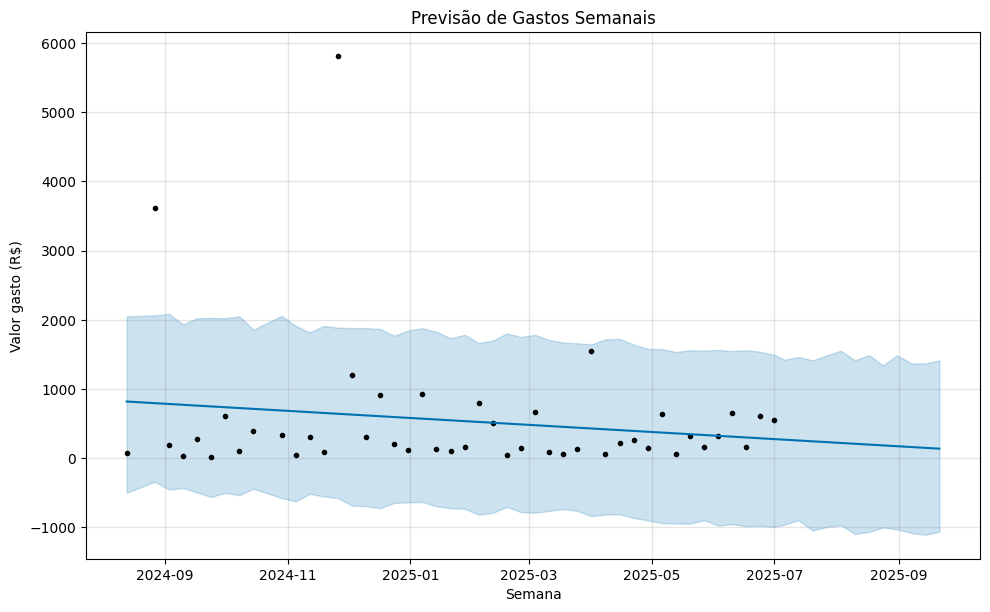

In [174]:
fig = model.plot(forecast)
plt.title("Previsão de Gastos Semanais")
plt.xlabel("Semana")
plt.ylabel("Valor gasto (R$)")
plt.grid(True)
plt.show()


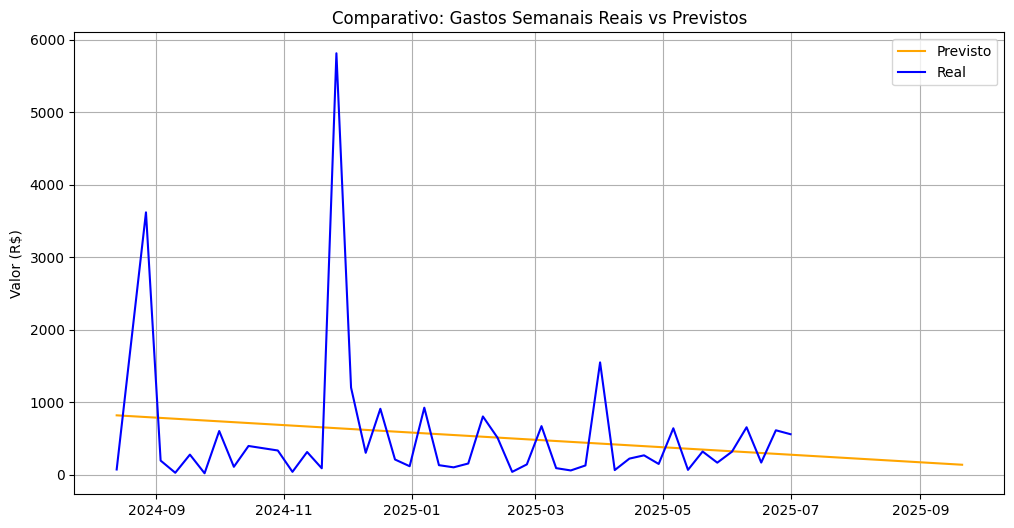

In [175]:
comparativo = forecast[["ds", "yhat"]].merge(gastos_semanais, on="ds", how="left")
comparativo.set_index("ds", inplace=True)

plt.plot(comparativo.index, comparativo["yhat"], label="Previsto", color="orange")
plt.plot(comparativo.index, comparativo["y"], label="Real", color="blue")
plt.legend()
plt.title("Comparativo: Gastos Semanais Reais vs Previstos")
plt.ylabel("Valor (R$)")
plt.grid(True)
plt.show()


In [176]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)


,ds,yhat,yhat_lower,yhat_upper
45,2025-07-06,265.669416,-963.064921,1420.756441
46,2025-07-13,253.860446,-896.980342,1462.103212
47,2025-07-20,242.051477,-1048.426160,1412.851830
48,2025-07-27,230.242507,-995.678086,1484.032653
49,2025-08-03,218.433538,-969.464627,1552.014961
50,2025-08-10,206.624568,-1096.239004,1412.929178
51,2025-08-17,194.815599,-1068.459887,1488.991896
52,2025-08-24,183.006629,-1002.816012,1339.765379
53,2025-08-31,171.197660,-1030.267597,1486.299854
54,2025-09-07,159.388690,-1083.127807,1367.526906
